In [1]:
import numpy as np
import pandas as pd

data = {
    "ev_boyutu":[50,60,70,80,90,100,110,120,130,140],
    "ev_fiyatı":[150000,180000,210000,240000,270000,300000,330000,360000,390000,420000]
}

df = pd.DataFrame(data)

print(df)

   ev_boyutu  ev_fiyatı
0         50     150000
1         60     180000
2         70     210000
3         80     240000
4         90     270000
5        100     300000
6        110     330000
7        120     360000
8        130     390000
9        140     420000


In [2]:
x = df[["ev_boyutu"]]
y = df.ev_fiyatı
print(x)
print(y)

   ev_boyutu
0         50
1         60
2         70
3         80
4         90
5        100
6        110
7        120
8        130
9        140
0    150000
1    180000
2    210000
3    240000
4    270000
5    300000
6    330000
7    360000
8    390000
9    420000
Name: ev_fiyatı, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.2,random_state=42)
print(f"""
    xTrain: {xTrain.shape},
    xTest: {xTest.shape}, 
    
    yTrain: {yTrain.shape},
    yTest: {yTest.shape}
    """)


    xTrain: (8, 1),
    xTest: (2, 1), 
    
    yTrain: (8,),
    yTest: (2,)
    


In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(xTrain,yTrain)

yPred = model.predict(xTest)

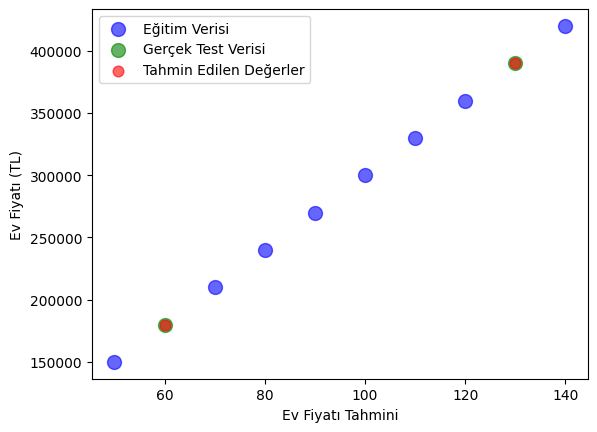

In [5]:
import matplotlib.pyplot as plt

plt.scatter(xTrain, yTrain, color='blue', label='Eğitim Verisi', alpha=0.6, s=100) #alpha: opaklık, s:size
plt.scatter(xTest, yTest, color='green', label='Gerçek Test Verisi', alpha=0.6, s=100) 
plt.scatter(xTest, yPred, color='red', label='Tahmin Edilen Değerler', alpha=0.6, s=60) 
plt.xlabel('Ev Büyüklüğü (m2)')
plt.ylabel('Ev Fiyatı (TL)')
plt.xlabel('Ev Fiyatı Tahmini')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f"β0 (Sabit Terim):{model.intercept_}")
print(f"β1 (Eğim Katsayısı):{model.coef_[0]}")

r2 = r2_score(yTest,yPred)
print(f"R^2 Score: {r2}")

#Adjust R^2 skor

n = xTest.shape[0] #Gözlem Sayısı
p = xTest.shape[1] #Bağımsız Değişken Sayısı


β0 (Sabit Terim):0.0
β1 (Eğim Katsayısı):3000.0
R^2 Score: 1.0


In [7]:
adjusted_r2 = 1-(1-r2) * (n-1) / (n-p-1)
print(f'Adjusted R^2 Score: {adjusted_r2}')
mse = mean_squared_error(yTest,yPred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yTest,yPred)

print(f"""
    Adjusted R^2 Score: {adjusted_r2},
    Mean Squared Error(MSE): {mse}, 
    Root Mean Squared Error(RMSE): {rmse},
    Mean Absoulte Error(MAE): {mae}
    """)

ZeroDivisionError: float division by zero